In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd
from scipy import stats

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)


from matplotlib.markers import TICKDOWN

In [3]:
def file_import(file_path, sheet_names):
    file_name = pd.read_excel(file_path, sheet_name = sheet_names)
    return file_name

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def pearsonr_1D(x, y):
    if (x.size != y.size):
        return None
    
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    upper = np.sum(xm * ym)
    lower = np.sqrt(np.sum(np.power(xm, 2)) * np.sum(np.power(ym, 2)))
    
    if (lower == 0):
        return None
    
    rho = upper / lower
    return rho

In [4]:
# Import Data
p16_FBS_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_p16_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
p16_FBS_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_p16_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
p16_FBS_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_p16_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
p16_FBS_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_p16_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(p16_FBS_pred, p16_FBS_pred_background):
    p16_FBS_pred[pred].Mean = p16_FBS_pred[pred].Mean - np.mean (p16_FBS_pred_background[background].Mean)
    p16_FBS_pred[pred].Mean = p16_FBS_pred[pred].Mean / np.mean (p16_FBS_pred["P2"].Mean)
    

for target, background in zip(p16_FBS_target, p16_FBS_target_background):
    p16_FBS_target[target].Mean = p16_FBS_target[target].Mean - np.mean (p16_FBS_target_background[background].Mean)
    p16_FBS_target[target].Mean = p16_FBS_target[target].Mean / np.mean (p16_FBS_target["P2"].Mean)
    print (p16_FBS_target[target].Mean)

0     0.824403
1     0.427264
2     0.752794
3     1.092317
4     0.333432
5     0.681597
6     0.228489
7     0.434672
8     0.959800
9     1.554480
10    4.472731
11    1.156106
12    0.620689
13    3.083774
14    0.683244
15    0.513276
16    0.851565
17    0.453191
18    0.316559
19    0.378702
20    0.341663
21    0.153588
22    0.572539
23    3.564044
24    0.549081
Name: Mean, dtype: float64
0     1.6077
1     0.9237
2     0.7777
3     4.3457
4     7.4027
5     1.4767
6     1.4517
7     1.1567
8     1.1557
9     1.4137
10    0.9677
11    1.2567
12    0.8647
13    0.7587
14    0.6597
15    0.9737
16    0.9927
17    3.1697
18    0.4407
19    0.4087
20   -0.0093
21    0.6957
22    0.2647
23    0.4837
24    0.9647
Name: Mean, dtype: float64
0     0.9622
1     1.1322
2     0.8472
3     0.8302
4     1.4182
5     0.4012
6     3.5832
7     0.4022
8     0.7762
9     0.6962
10    0.9282
11    0.8672
12    0.8912
13    3.2762
14    4.1852
15    2.1732
16    2.0392
17    0.9462
18    7.3272

In [5]:
for background in p16_FBS_pred_background:
    print(np.mean (p16_FBS_pred_background[background].Mean))
    
for background in p16_FBS_target_background:
    print(np.mean (p16_FBS_target_background[background].Mean))

6.0998
6.1723
6.3608
6.587299999999999
6.6868
6.0998
6.1723
6.3608
6.587299999999999
6.6868


In [6]:
# Import Data
p16_stemfit_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_p16_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
p16_stemfit_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_p16_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
p16_stemfit_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_p16_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
p16_stemfit_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_p16_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(p16_stemfit_pred, p16_stemfit_pred_background):
    p16_stemfit_pred[pred].Mean = p16_stemfit_pred[pred].Mean - np.mean (p16_stemfit_pred_background[background].Mean)
    p16_stemfit_pred[pred].Mean = p16_stemfit_pred[pred].Mean / np.mean (p16_stemfit_pred["P2"].Mean)

for target, background in zip(p16_stemfit_target, p16_stemfit_target_background):
    p16_stemfit_target[target].Mean = p16_stemfit_target[target].Mean - np.mean (p16_stemfit_target_background[background].Mean)
    p16_stemfit_target[target].Mean = p16_stemfit_target[target].Mean / np.mean (p16_stemfit_target["P2"].Mean)

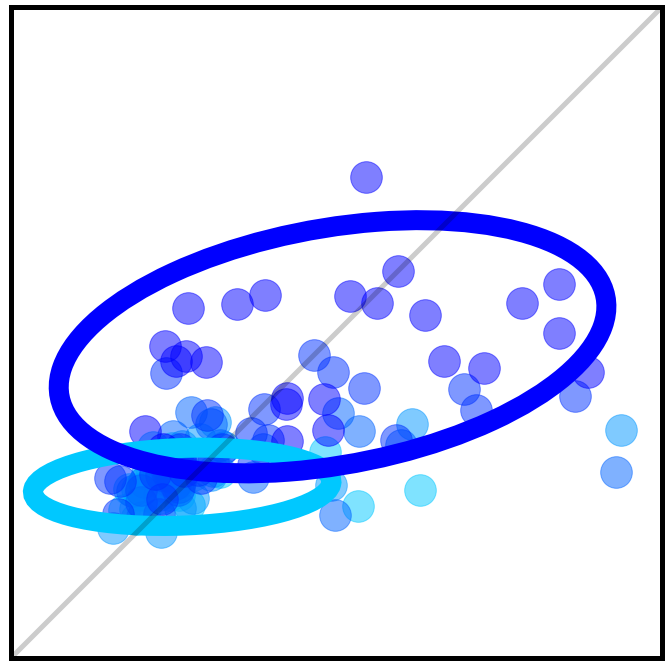

In [7]:
fig, axs = plt.subplots(figsize = [10,10])
axs.spines["top"].set_linewidth(5)
axs.spines["left"].set_linewidth(5)
axs.spines["right"].set_linewidth(5)
axs.spines["bottom"].set_linewidth(5)

plt.xlim(-1.5,8)
plt.ylim(-1.5,8)

# Plot Scatter Plots
colors = ["#00c8ff", "#0096ff", "#0064ff", "#0032ff", "#0000ff"]
for pred, target, color in zip(p16_FBS_pred, p16_FBS_target, colors):
    plt.scatter(p16_FBS_target[target].Mean, p16_FBS_pred[pred].Mean, c = color, alpha = 0.5, label = pred, s=1000)

# Plot Circles
confidence_ellipse (p16_FBS_target['P2'].Mean, p16_FBS_pred['P2'].Mean, ax = axs, n_std = 2.0, edgecolor = "#00c8ff", linewidth=20)
confidence_ellipse (p16_FBS_target['P10'].Mean, p16_FBS_pred['P10'].Mean, ax = axs, n_std = 2.0, edgecolor = "#0000ff", linewidth=20)

# Plot Titles
# plt.title ("P16")
# plt.xlabel ("Target Intensity")
# plt.ylabel ("Prediction Intensity")
# plt.legend()

# Plot f(x) = x
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot (x, x, c = 'black', alpha = 0.2, linewidth = 5)

axs.axes.xaxis.set_visible(False)
axs.axes.yaxis.set_visible(False)

# plt.legend(frameon=False, loc='upper center', ncol = 5, fontsize = 'x-small', labelspacing = 0, handlelength = 1.5, handletextpad = 0, borderpad = 0, columnspacing = 0)

plt.tight_layout()
plt.plot(figsize=(300, 150), dpi=100)
plt.savefig(fname="p16_FBS")

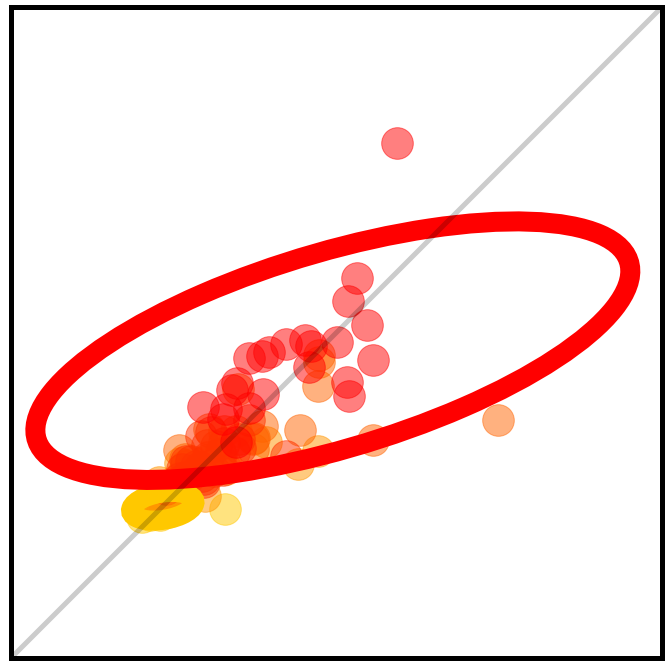

In [8]:
fig, axs = plt.subplots(figsize = [10,10])
axs.spines["top"].set_linewidth(5)
axs.spines["left"].set_linewidth(5)
axs.spines["right"].set_linewidth(5)
axs.spines["bottom"].set_linewidth(5)

plt.xlim(-6,24)
plt.ylim(-6,24)

# Plot Scatter Plots
colors = ["#ffc800", "#ff9600", "#ff6400", "#ff3200", "#ff0000"]
for pred, target, color in zip(p16_stemfit_pred, p16_stemfit_target, colors):
    plt.scatter(p16_stemfit_target[target].Mean, p16_stemfit_pred[pred].Mean, c = color, alpha = 0.5, label = pred, s=1000)

# Plot Circles
confidence_ellipse (p16_stemfit_target['P2'].Mean, p16_stemfit_pred['P2'].Mean, ax = axs, n_std = 2.0, edgecolor = "#ffc800", linewidth=20)
confidence_ellipse (p16_stemfit_target['P10'].Mean, p16_stemfit_pred['P10'].Mean, ax = axs, n_std = 2.0, edgecolor = "#ff0000", linewidth=20)

# Plot Titles
# plt.title ("p16")
# plt.xlabel ("Target Intensity")
# plt.ylabel ("Prediction Intensity")
# plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

# Plot f(x) = x
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot (x, x, c = 'black', alpha = 0.2, linewidth = 5)

axs.axes.xaxis.set_visible(False)
axs.axes.yaxis.set_visible(False)

plt.tight_layout()
plt.plot(figsize=(300, 150), dpi=100)
plt.savefig(fname="p16_stemfit")

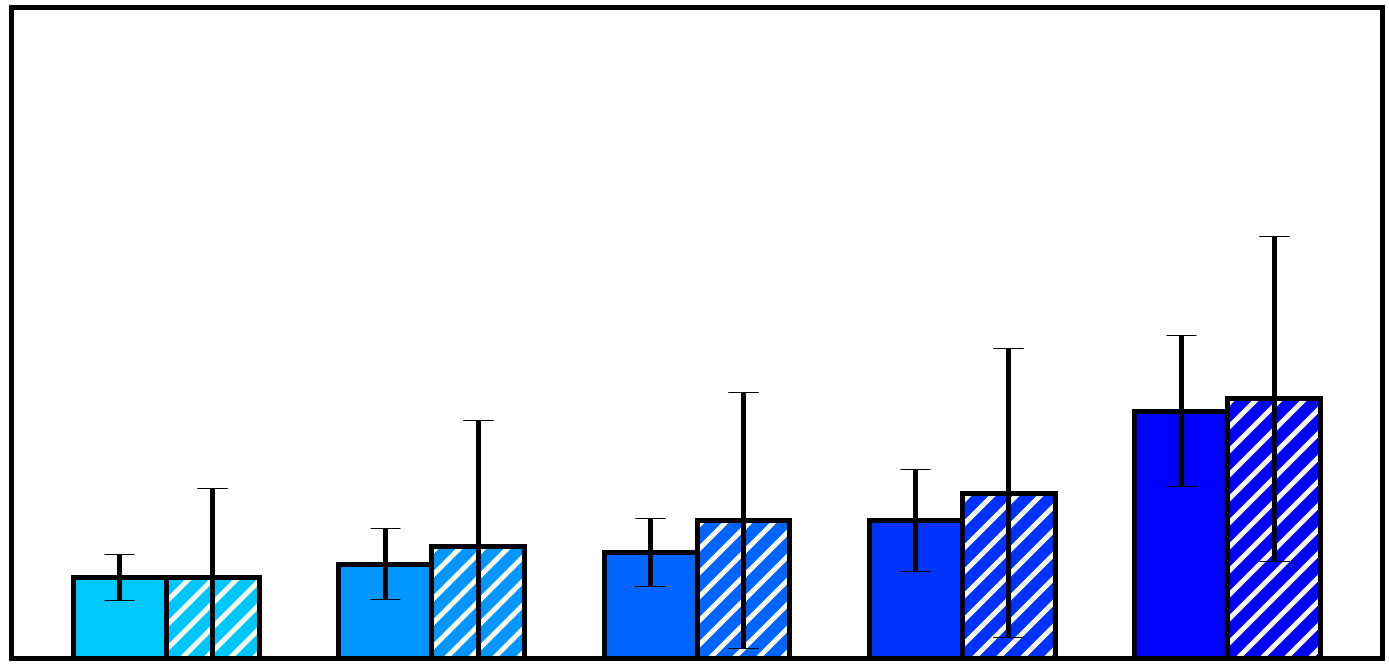

In [9]:
# Constants
indexes = np.arange(len(p16_FBS_pred))
bar_width = 0.35

# Create Subplot
fix, ax = plt.subplots(figsize = [20,10])

plt.ylim(0,8)

ax.spines["top"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)

plt.rcParams['hatch.linewidth'] = 5


# Plot Barplot
colors = ["#00c8ff", "#0096ff", "#0064ff", "#0032ff", "#0000ff"]
error_config = dict(elinewidth = 5, ecolor = '0', capsize = 15)
for pred, target, index, color in zip(p16_FBS_pred, p16_FBS_target, indexes, colors):
    ax.bar(index, p16_FBS_pred[pred].Mean.mean(), bar_width, yerr = p16_FBS_pred[pred].Mean.std(), error_kw = error_config, color = color, edgecolor = "black", linewidth = 5)
    ax.bar(index + bar_width, p16_FBS_target[target].Mean.mean(), bar_width, yerr = p16_FBS_target[target].Mean.std(), error_kw = error_config, color = color, hatch = "/", edgecolor = "white", linewidth = 5)
    ax.bar(index + bar_width, p16_FBS_target[target].Mean.mean(), bar_width, yerr = p16_FBS_target[target].Mean.std(), error_kw = error_config, color = "none", edgecolor = "black", linewidth = 5)

# Plot Titles
# ax.set_title("p16")
# ax.set_ylabel("Mean Intensity")
ax.set_xticks(indexes + bar_width / 2)
ax.set_xticklabels(p16_FBS_pred)

# prediction_label = mpatches.Patch(facecolor='#0000ff', label='Prediction')
# target_label = mpatches.Patch(facecolor='#0000ff', hatch = "/", label='Target')
# plt.legend(handles=[prediction_label, target_label], frameon=False, loc='upper left', fontsize = 'small', borderpad = 0)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.tight_layout()
plt.savefig(fname="p16_FBS_Bar")

In [10]:
stats.ttest_ind (p16_FBS_pred["P2"].Mean, p16_FBS_pred["P10"].Mean)

Ttest_indResult(statistic=-10.569334845358442, pvalue=4.0066646593026934e-14)

In [11]:
stats.ttest_ind (p16_FBS_target["P2"].Mean, p16_FBS_target["P10"].Mean)

Ttest_indResult(statistic=-4.821315132965204, pvalue=1.4774341011763274e-05)

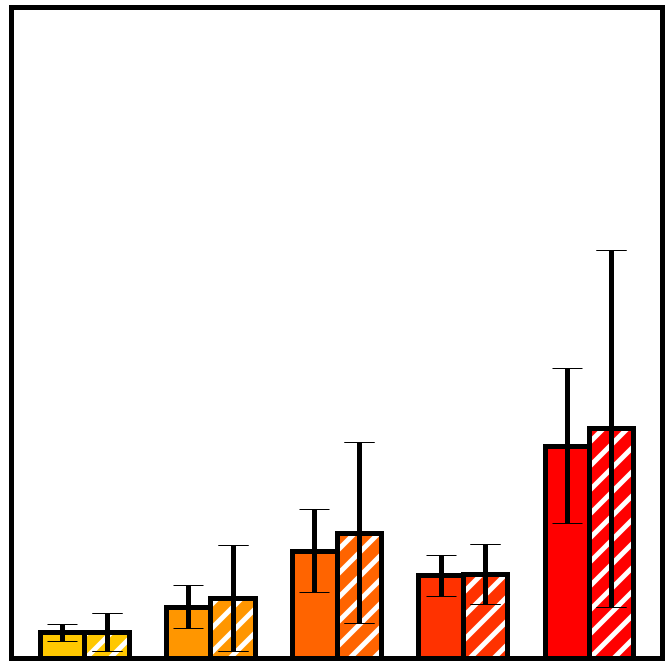

In [12]:
# Constants
indexes = np.arange(len(p16_stemfit_pred))
bar_width = 0.35

# Create Subplot
fix, ax = plt.subplots(figsize = [10,10])

plt.ylim(0,25)

ax.spines["top"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)

plt.rcParams['hatch.linewidth'] = 5

# Plot Barplot
colors = ["#ffc800", "#ff9600", "#ff6400", "#ff3200", "#ff0000"]
error_config = dict(elinewidth = 5, ecolor = '0', capsize = 15)
for pred, target, index, color in zip(p16_stemfit_pred, p16_stemfit_target, indexes, colors):
    ax.bar(index, p16_stemfit_pred[pred].Mean.mean(), bar_width, yerr = p16_stemfit_pred[pred].Mean.std(), error_kw = error_config, color = color, edgecolor = "black", linewidth = 5)
    ax.bar(index + bar_width, p16_stemfit_target[target].Mean.mean(), bar_width, yerr = p16_stemfit_target[target].Mean.std(), error_kw = error_config, color = color, hatch = "/", edgecolor = "white", linewidth = 5)
    ax.bar(index + bar_width, p16_stemfit_target[target].Mean.mean(), bar_width, yerr = p16_stemfit_target[target].Mean.std(), error_kw = error_config, color = "none", edgecolor = "black", linewidth = 5)

# Plot Titles
# ax.set_title("p16")
# ax.set_ylabel("Mean Intensity")
ax.set_xticks(indexes + bar_width / 2)
ax.set_xticklabels(p16_stemfit_pred)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# prediction_label = mpatches.Patch(facecolor='#ff0000', edgecolor = 'black', label='               ')
# target_label = mpatches.Patch(facecolor='#ff0000', edgecolor = 'black', hatch = "/", label='             ')
# plt.legend(handles=[prediction_label, target_label], frameon=False, loc='upper left', fontsize = 'small', borderpad = 1)

plt.tight_layout()
plt.savefig(fname="p16_stemfit_Bar")

In [13]:
stats.ttest_ind (p16_stemfit_pred["P2"].Mean, p16_stemfit_pred["P10"].Mean)

Ttest_indResult(statistic=-11.961976767481215, pvalue=5.237731521170825e-16)

In [14]:
stats.ttest_ind (p16_stemfit_target["P2"].Mean, p16_stemfit_target["P10"].Mean)

Ttest_indResult(statistic=-5.685003150314889, pvalue=7.564202557353242e-07)